# 5.Borderline (under construction)

This notebook demonstrates 

## Packages

In [ ]:
import spateo as st
import anndata

import plotly.express as px

import plotly.io as pio
pio.renderers.default = 'iframe'

2023-09-19 14:34:34.319161: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/jingzh/.conda/envs/spateo_dev/lib/python3.8/site-packages/spaghetti-1.6.5-py3.8.egg/spaghetti/network.py:36: FutureWarning:

The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.



|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


## Data source

We use the data from Wu et al. to demonstrate a use case of borderline digitization, which achieves similar goal as in the paper.

Wu, L., Yan, J., Bai, Y. et al. An invasive zone in human liver cancer identified by Stereo-seq promotes hepatocyte–tumor cell crosstalk, local immunosuppression and tumor progression. Cell Res 33, 585–603 (2023). https://doi.org/10.1038/s41422-023-00831-1

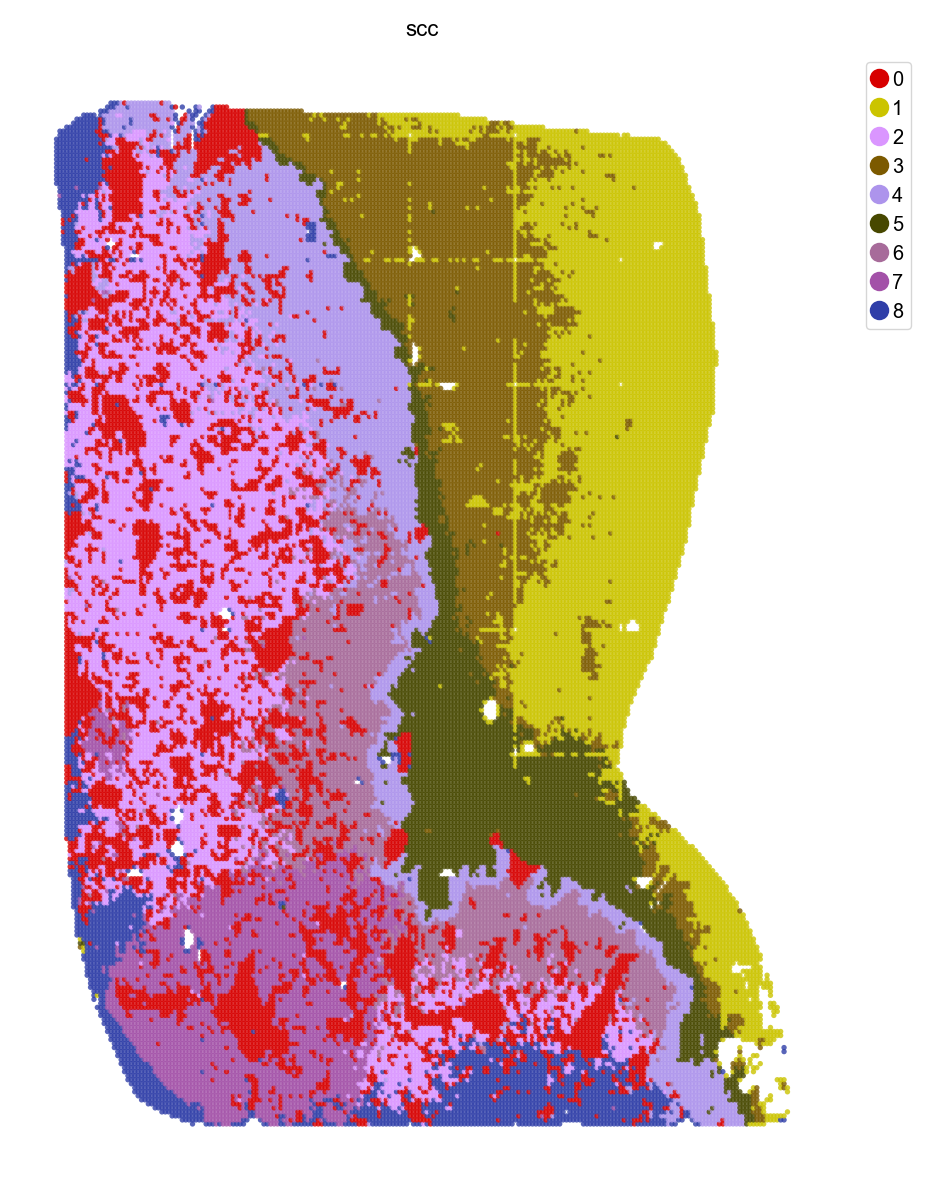

In [ ]:
#Load clustered anndata object

adata = anndata.read("../data/icc/adata_bin50_scc_cluster.h5ad")
adata.obsm['bin50_spatial'] = adata.obsm['spatial']//50
adata.uns["__type"] = "UMI"
st.pl.space(adata, space = "bin50_spatial", color=['scc'], pointsize=0.2, cmap="Set1", show_legend="upper left")

In [ ]:
adata

AnnData object with n_obs × n_vars = 45923 × 37634
    obs: 'area', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'n_counts', 'scc'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: '__type', 'neighbors', 'scc', 'scc_colors', 'spatial', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'bbox', 'contour', 'spatial', 'bin50_spatial', 'X_bin50_spatial'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

##  Boundary identification

|-----> Setting up source and target area.
|-----> Identifying boundary.
|-----> Set up the color for the clusters with the tab20 colormap.
|-----> Saving integer labels for clusters into adata.obs['cluster_img_label'].
|-----> Prepare a mask image and assign each pixel to the corresponding cluster id.
|-----> Get selected areas in labels:[2].
|-----> Close cluster morphology.
|-----> Remove small region.
|-----> Extract contours.
|-----> Get selected areas in labels:[3].
|-----> Close cluster morphology.
|-----> Remove small region.
|-----> Extract contours.
|-----> Generating boundary line image.
|-----> Saving boundary into adata.obs['boundary_line'] for visualization.


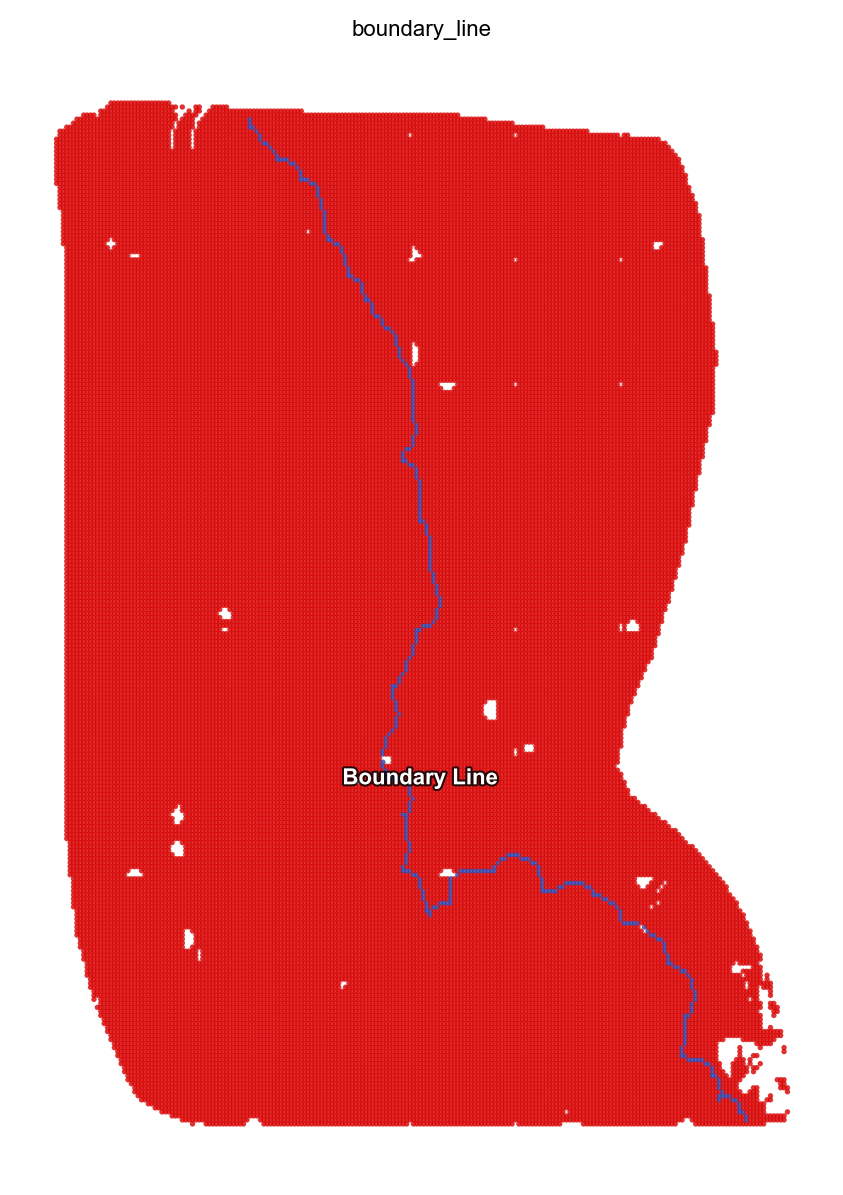

In [ ]:
#identify boundary line between areas of interest

bdl_img = st.dd.identify_boundary(
    adata=adata,
    spatial_key="bin50_spatial",
    cluster_key="scc",
    bin_size=1,
    source_id=["5","3"],
    target_id=["4","0","6","7"],
)

st.pl.space(adata, color=['boundary_line'], pointsize=0.2, cmap = "Reds")

##  Digitization (gridding along the borderline region)

In [ ]:
#select a specific part of boundary (identify start point and end point via plotly)
px.imshow(bdl_img)

|-----> Extracted boundary line length: 353.
|-----> Line total length: 409.99. Segmenting into 25 columns, with 16.4 each.
|-----> Generating layer area.
|-----> Refining layer contour.
|-----> Line total length: 372.65. Segmenting into 25 columns, with 14.91 each.
|-----> Line total length: 384.3. Segmenting into 25 columns, with 15.37 each.
|-----> Generating layer area.
|-----> Refining layer contour.
|-----> Line total length: 348.92. Segmenting into 25 columns, with 13.96 each.
|-----> Line total length: 366.89. Segmenting into 25 columns, with 14.68 each.
|-----> Generating layer area.
|-----> Refining layer contour.
|-----> Line total length: 329.71. Segmenting into 25 columns, with 13.19 each.
|-----> Line total length: 362.99. Segmenting into 25 columns, with 14.52 each.


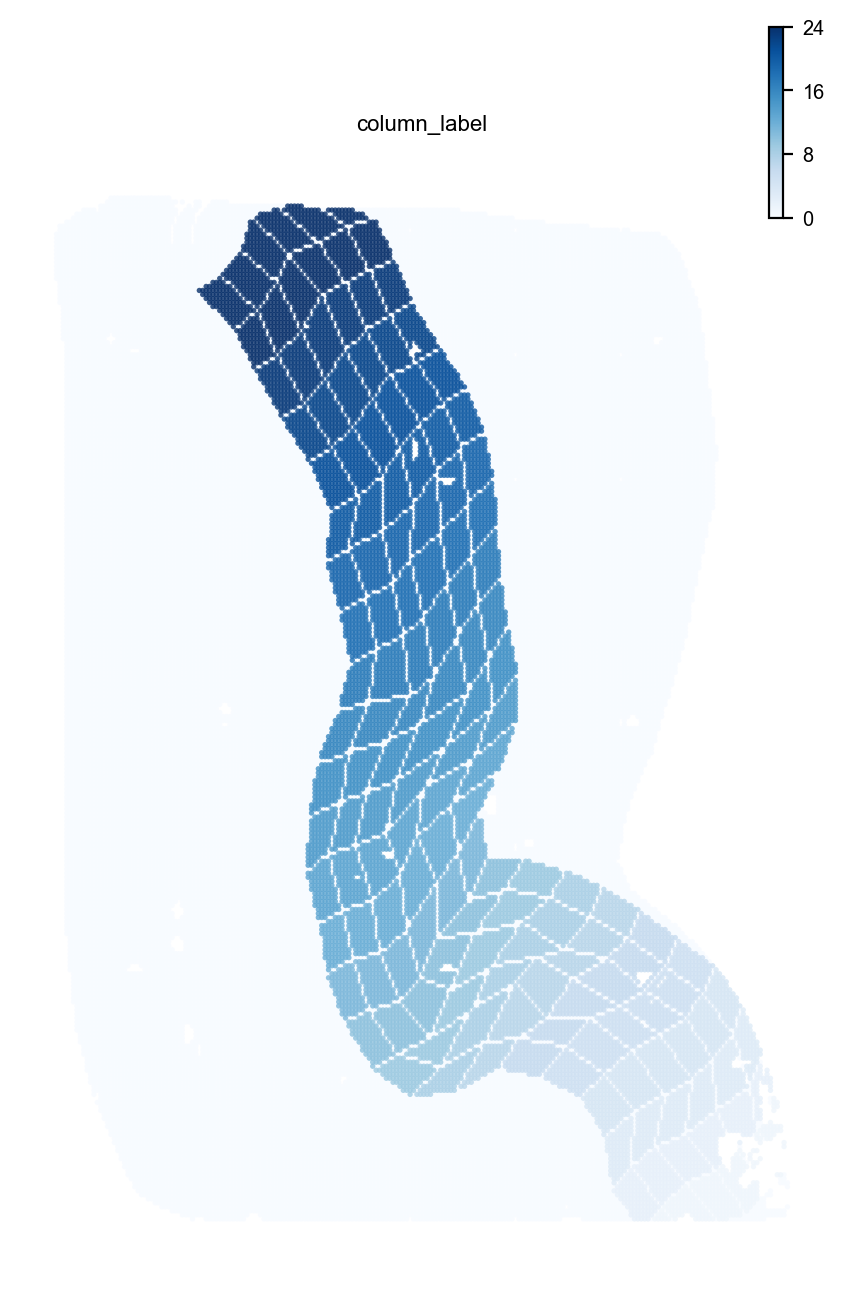

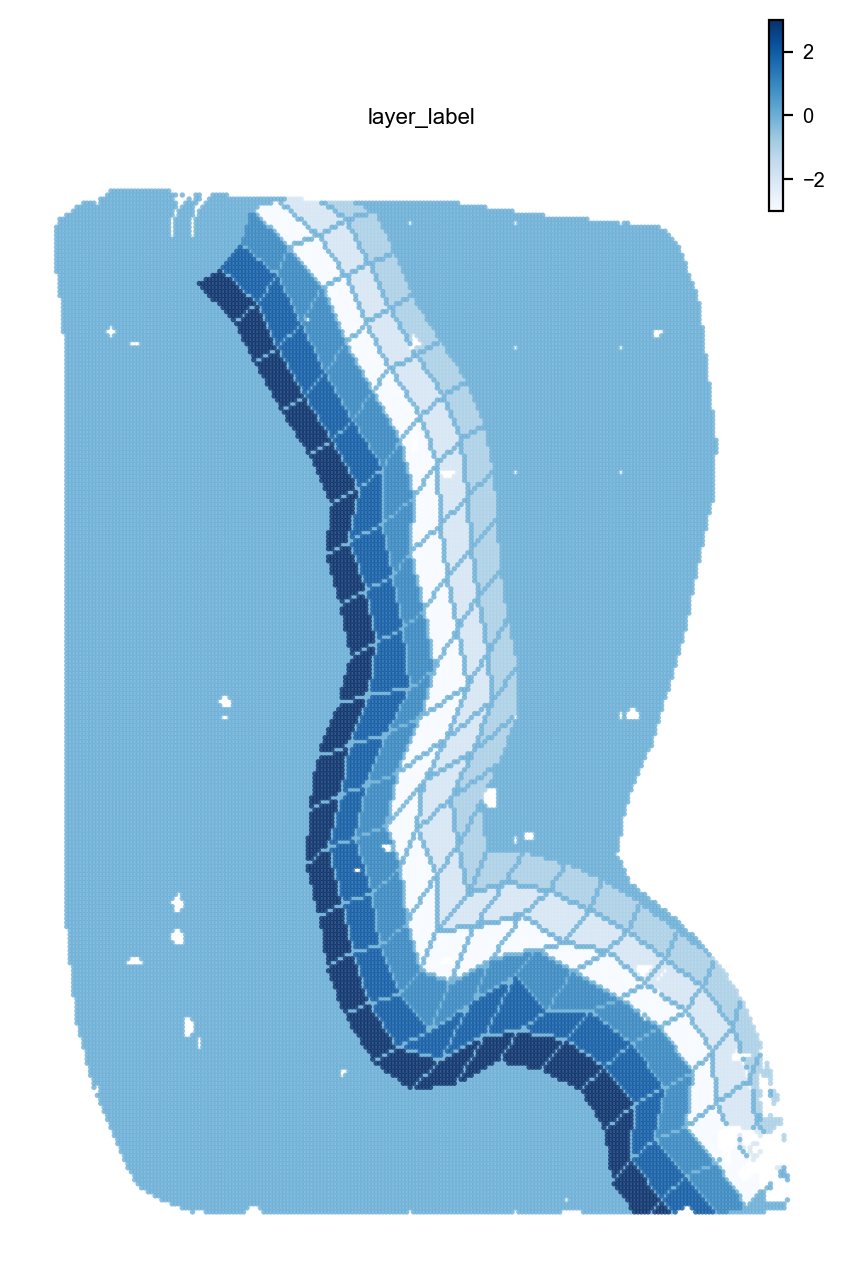

In [ ]:
#user input
pt_start = (62,252)
pt_end = (311,106)

#digitize boundary related area
fmt_bdl_ls, fmt_bdl_img = st.dd.format_boundary_line(bdl_img, pt_start, pt_end)
st.dd.boundary_gridding(
    adata=adata,
    spatial_key="bin50_spatial",
    boundary_line_img=fmt_bdl_img,
    boundary_line_list=fmt_bdl_ls,
    n_layer = 3,
    layer_width=8,
    init = True,
)
st.pl.space(adata,color=['column_label'],pointsize=0.2,cmap="Blues")
st.pl.space(adata,color=['layer_label'],pointsize=0.2,cmap="Blues")

In [ ]:
adata

AnnData object with n_obs × n_vars = 45923 × 37634
    obs: 'area', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'n_counts', 'scc', 'boundary_line', 'layer_label', 'column_label'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: '__type', 'neighbors', 'scc', 'scc_colors', 'spatial', 'spatial_neighbors', 'umap', 'boundary_line_colors'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'bbox', 'contour', 'spatial', 'bin50_spatial', 'X_bin50_spatial'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [ ]:
#adata.write("ICC_demo.h5ad", compression="gzip")